Generate F1 scores and confusion matrices for each model.

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.layers import Attention
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.models import load_model
from IPython.display import HTML as html_print
from IPython.display import display
import keras.backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, f1_score, precision_score, recall_score, plot_confusion_matrix
from google.colab import files
from pandas import DataFrame as df
import seaborn as sn
import re
import os
import time
import numpy as np
import time
import string
import math
import matplotlib
import pickle

In [2]:
## NOT NECESSARY FOR TAS
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
genre_idx = files.upload()
with open("genre_idx.pickle", "rb") as f:
  genre_idx = pickle.load(f)

Saving genre_idx.pickle to genre_idx.pickle


In [0]:
genres = list(genre_idx.keys())

# MLP for Continous Features

In [4]:
## Upload:
## train_features.continuous.npy
## train_labels_continuous.npy
train_features = files.upload()
train_labels = files.upload()

Saving train_features_continuous.npy to train_features_continuous.npy


Saving train_labels_continuous.npy to train_labels_continuous.npy


In [0]:
X_train_mlp_c = np.load("train_features_continuous.npy")
X_train_mlp_c = np.delete(X_train_mlp_c, 0, axis = 1)
y_train = np.load("train_labels_continuous.npy")

In [0]:
## UPLOAD
## model_600_mlp_continuous.h5
model = files.upload()
from keras.models import load_model
mlp_c = load_model("model_600_mlp_continuous.h5")

In [0]:
## NOT NECESSARY FOR TAS
mlp_c_file_path = F"/content/gdrive/My Drive/model_600_mlp_continuous.h5" 
from keras.models import load_model
mlp_c = load_model(mlp_c_file_path)

In [0]:
pred_train_mlp_c = mlp_c.predict(X_train_mlp_c)
pred_train_mlp_c[pred_train_mlp_c >= 0.50] = 1
pred_train_mlp_c[pred_train_mlp_c < 0.50] = 0

In [13]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [16]:
f1_train_micro = f1_score(y_train, pred_train_mlp_c, average = 'micro')
f1_train_macro = f1_score(y_train, pred_train_mlp_c, average = 'macro', zero_division = 1)
print("Train Micro:", f1_train_micro)
print("Train Macro:", f1_train_macro)

Train Micro: 0.8776978417266187
Train Macro: 0.8834472216442465


In [18]:
## Upload:
## test_features.continuous.npy
## test_labels.npy
test_script = files.upload()
test_labels = files.upload()

Saving test_features_continuous.npy to test_features_continuous (1).npy


Saving test_labels.npy to test_labels.npy


In [0]:
X_test_mlp_c = np.load("test_features_continuous.npy")
X_test_mlp_c = np.delete(X_test_mlp_c, 0, axis = 1)
y_test = np.load("test_labels.npy")

In [0]:
pred_test_mlp_c = mlp_c.predict(X_test_mlp_c)
pred_test_mlp_c[pred_test_mlp_c >= 0.5] = 1
pred_test_mlp_c[pred_test_mlp_c < 0.5] = 0

In [119]:
f1_test_micro = f1_score(y_test, pred_test_mlp_c, average = 'micro')
f1_test_macro = f1_score(y_test, pred_test_mlp_c, average = 'macro', zero_division = 1)
print("Test Micro:", f1_test_micro)
print("Test Macro:", f1_test_macro)

Test Micro: 0.291015625
Test Macro: 0.16740493523996006


In [0]:
confusion_mat_mlp_c = multilabel_confusion_matrix(y_test, pred_test_mlp_c)
# print(confusion_mat_mlp_c)

In [0]:
def make_heatmap(mat):
  cm_df = df(mat, index = ['NO', 'YES'], columns = ['NO', 'YES'])
  plt.figure()
  sn.heatmap(cm_df, annot = True)

Heatmap for: action
Heatmap for: adult
Heatmap for: adventure
Heatmap for: animation
Heatmap for: biography
Heatmap for: comedy
Heatmap for: crime
Heatmap for: documentary
Heatmap for: drama
Heatmap for: family
Heatmap for: fantasy
Heatmap for: filmnoir
Heatmap for: history
Heatmap for: horror
Heatmap for: music
Heatmap for: musical
Heatmap for: mystery
Heatmap for: romance
Heatmap for: scifi
Heatmap for: short
Heatmap for: sport


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


Heatmap for: thriller
Heatmap for: war
Heatmap for: western


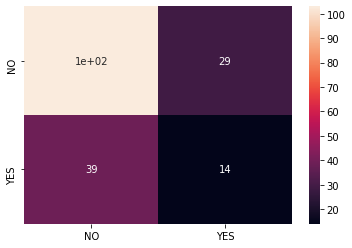

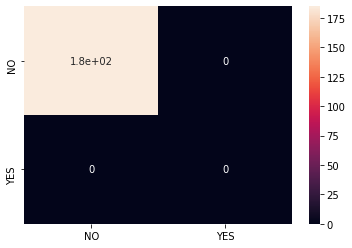

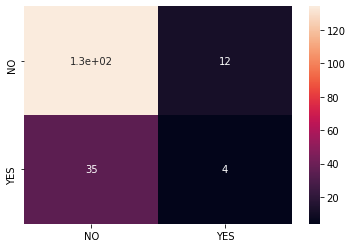

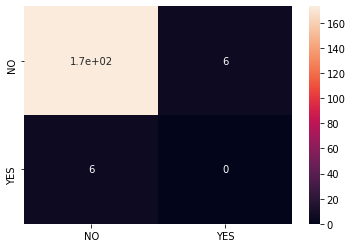

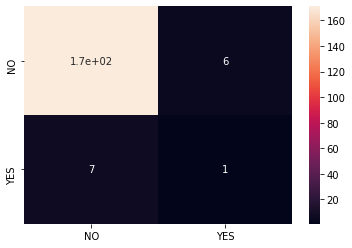

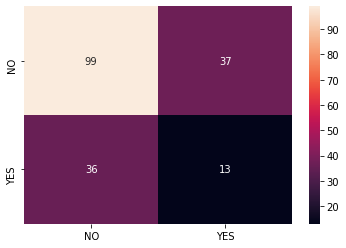

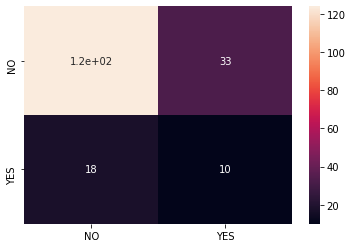

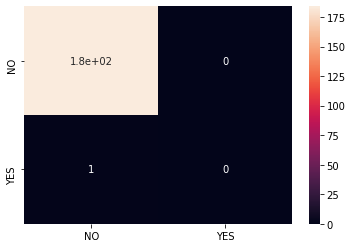

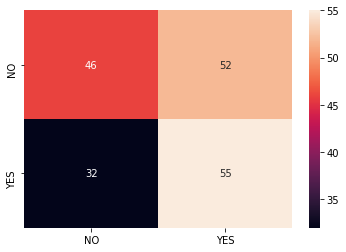

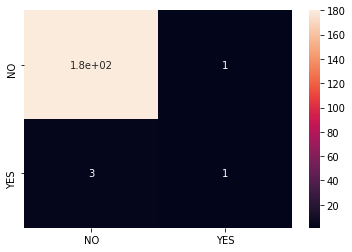

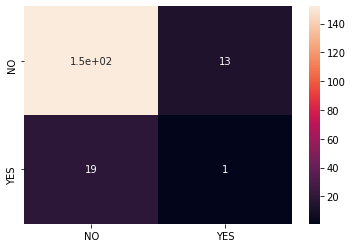

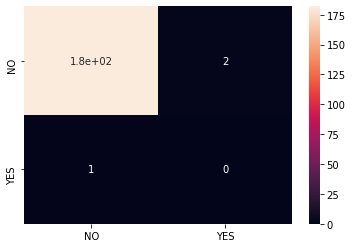

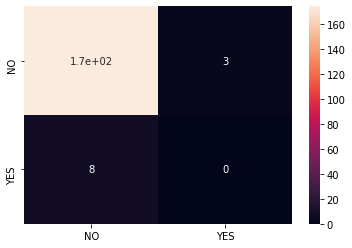

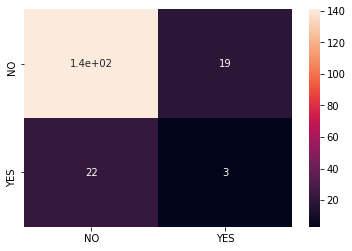

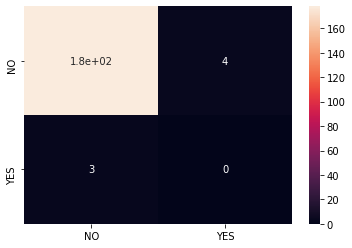

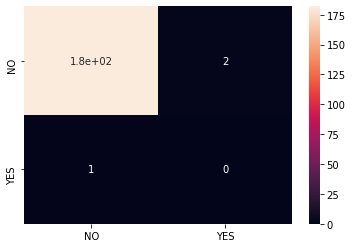

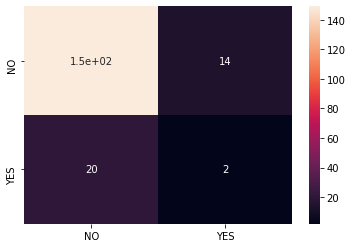

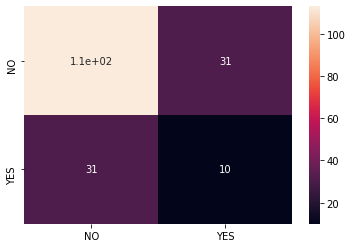

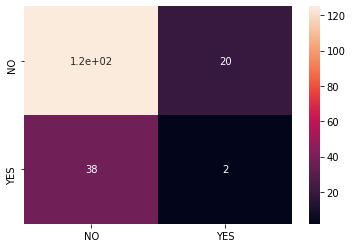

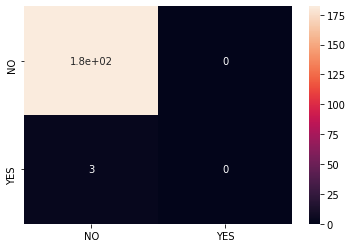

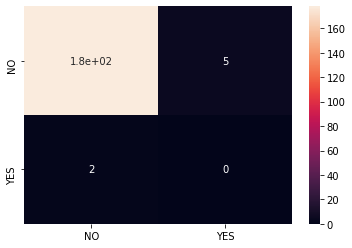

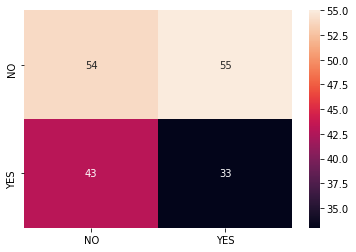

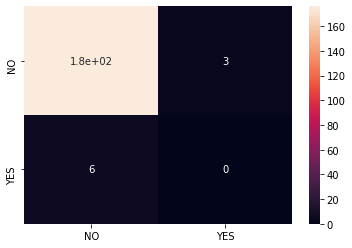

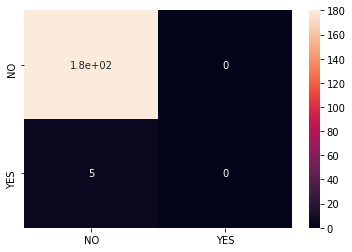

In [31]:
## Generate confusion matrices for test data
for i, mat in enumerate(confusion_mat_mlp_c):
  print("Heatmap for:", genres[i])
  make_heatmap(mat)

In [44]:
for i, mat in enumerate(confusion_mat_mlp_c):
  print(genres[i], (mat[0][1] + mat[1][0]), (mat[0][0] + mat[1][1]))

  

action 68 117
adult 0 185
adventure 47 138
animation 12 173
biography 13 172
comedy 73 112
crime 51 134
documentary 1 184
drama 84 101
family 4 181
fantasy 32 153
filmnoir 3 182
history 11 174
horror 41 144
music 7 178
musical 3 182
mystery 34 151
romance 62 123
scifi 58 127
short 3 182
sport 7 178
thriller 98 87
war 9 176
western 5 180


In [46]:
print(genre_idx)

{'action': 0, 'adult': 1, 'adventure': 2, 'animation': 3, 'biography': 4, 'comedy': 5, 'crime': 6, 'documentary': 7, 'drama': 8, 'family': 9, 'fantasy': 10, 'filmnoir': 11, 'history': 12, 'horror': 13, 'music': 14, 'musical': 15, 'mystery': 16, 'romance': 17, 'scifi': 18, 'short': 19, 'sport': 20, 'thriller': 21, 'war': 22, 'western': 23}


In [0]:
def make_vectors_map(arr, gen, t):
  if len(arr) == 0:
    return
  print(gen, t)
  plt.imshow(arr, cmap='hot', interpolation='nearest', aspect = 'auto')
  plt.colorbar()
  plt.savefig("feature_map" + "_" + gen + "_" + t + ".png")
  files.download("feature_map" + "_" + gen + "_" + t + ".png")
  plt.show()

history Sample


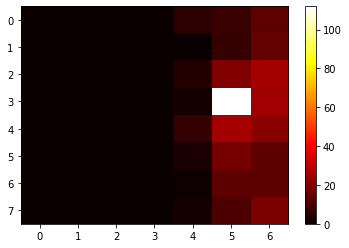

history FN


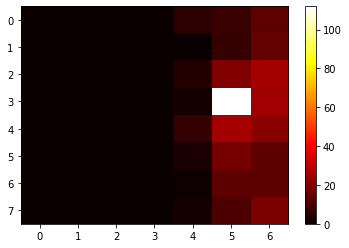

history FP


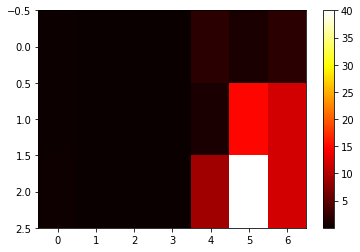

horror Sample


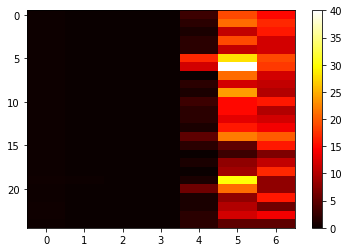

horror FN


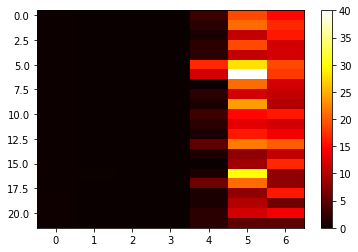

horror FP


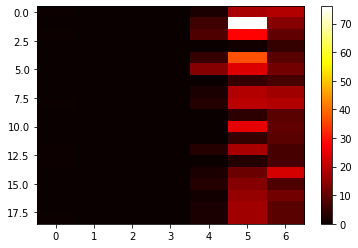

mystery Sample


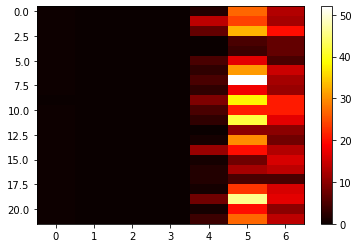

mystery FN


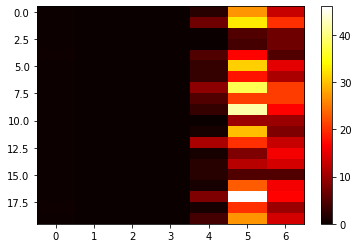

mystery FP


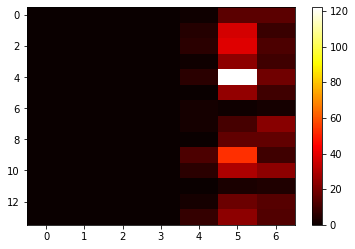

sport Sample


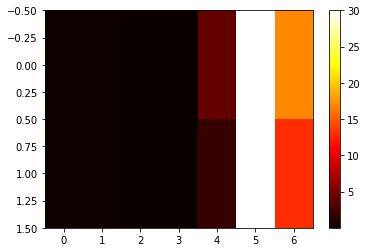

sport FN


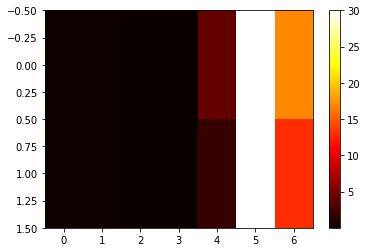

sport FP


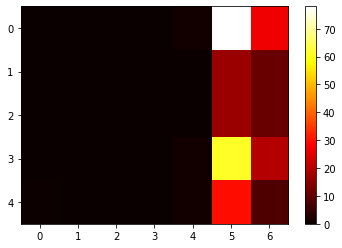

war Sample


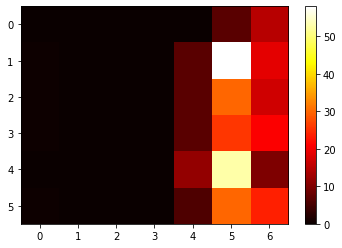

war FN


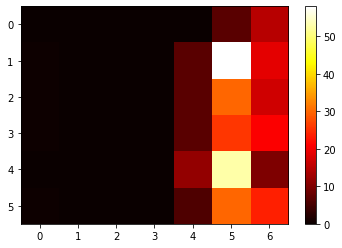

war FP


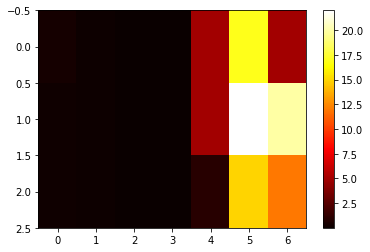

In [185]:
# examine = [0, 5, 6, 8, 17, 21]
examine = [12, 13, 16, 20, 22]

for e in examine:
  example_vec = []
  fn_vec = []
  fp_vec = []
  for i in range(len(y_test)):
    samp = np.array(X_test_mlp_c[i])
    if y_test[i][e] == 1:
      example_vec.append(samp)
    if y_test[i][e] == 1 and pred_test_mlp_c[i][e] == 0:
      fn_vec.append(samp)
    if y_test[i][e] == 0 and pred_test_mlp_c[i][e] == 1:
      fp_vec.append(samp)
  example_arr = np.asarray(example_vec)
  fn_arr = np.asarray(fn_vec)
  fp_arr = np.asarray(fp_vec)
  make_vectors_map(example_arr, genres[e], "Sample")
  make_vectors_map(fn_arr, genres[e], "FN")
  make_vectors_map(fp_arr, genres[e], "FP")
    

thriller Sample


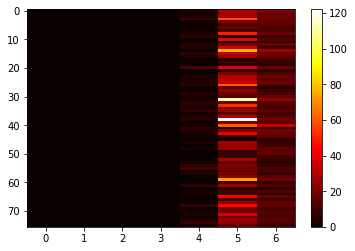

thriller FN


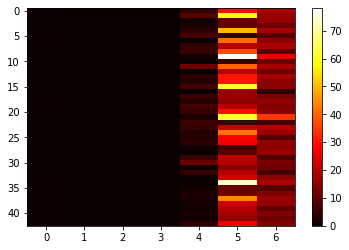

thriller FP


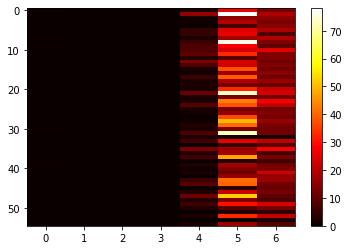

thriller Not


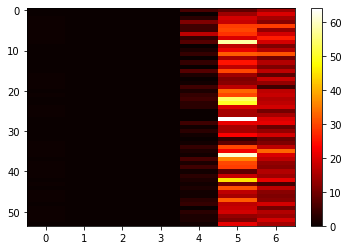

In [70]:
e = 21
example_vec = []
fn_vec = []
fp_vec = []
not_in = []
for i in range(len(y_test)):
    samp = np.array(X_test_mlp_c[i])
    if y_test[i][e] == 1:
      example_vec.append(samp)
    if y_test[i][e] == 1 and pred_test_mlp_c[i][e] == 0:
      fn_vec.append(samp)
    if y_test[i][e] == 0 and pred_test_mlp_c[i][e] == 1:
      fp_vec.append(samp)
    if y_test[i][e] == 0 and pred_test_mlp_c[i][e] == 0:
      not_in.append(samp)
example_arr = np.asarray(example_vec)
fn_arr = np.asarray(fn_vec)
fp_arr = np.asarray(fp_vec)
not_arr = np.asarray(not_in)
make_vectors_map(example_arr, genres[e], "Sample")
make_vectors_map(fn_arr, genres[e], "FN")
make_vectors_map(fp_arr, genres[e], "FP")
make_vectors_map(not_arr, genres[e], "Not")

# LSTM

In [72]:
from pandas import DataFrame as df
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [73]:
## UPLOAD
## train_scripts.txt
## It's kind of slow
practice_script = files.upload()

Saving train_scripts.txt to train_scripts.txt


In [0]:
## NOT NECESSARY IF y ALREADY CREATED ABOVE
premade_train_labels = files.upload()

In [0]:
def make_dataframe(text_file):
    id_lines = {}
    text_file = open(text_file, "r", encoding="ISO-8859-1")
    for line in text_file:
        fields = line.split(" +++$+++ ")
        if fields[2] not in id_lines:
            id_lines[fields[2]] = ''
        id_lines[fields[2]] = id_lines[fields[2]] + fields[4]
    # print(len(list(id_lines.values())))
    data = {'id': list(id_lines.keys()), 'scripts': list(id_lines.values())}
    # text_df = df(data = [list(id_lines.keys()), id_lines.values()])
    text_df = df(data)
    return text_df

In [75]:
# y = np.load("train_labels_continuous.npy")
text_df = make_dataframe("train_scripts.txt")

text_df.info()
text_df = text_df.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       432 non-null    object
 1   scripts  432 non-null    object
dtypes: object(2)
memory usage: 6.9+ KB


In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
text_df['scripts'] = text_df['scripts'].apply(clean_text)
text_df['scripts'] = text_df['scripts'].str.replace('\d+', '')

In [0]:
max_words = 50000
max_seq_len = 1000
embedding_dim = 100

In [78]:
tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(text_df['scripts'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 162043 unique tokens


In [0]:
X_train_lstm = tokenizer.texts_to_sequences(text_df['scripts'].values)
X_train_lstm = pad_sequences(X_train_lstm, maxlen = max_seq_len)

In [0]:
## UPLOAD
## model_150_lstm_1015.h5
model = files.upload()
from keras.models import load_model
lstm = load_model("model_150_lstm_1015.h5")

In [80]:
lstm_file_path = F"/content/gdrive/My Drive/model_150_lstm_1015.h5" 
from keras.models import load_model
lstm = load_model(lstm_file_path)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [0]:
pred_train_lstm = lstm.predict(X_train_lstm)
pred_train_lstm[pred_train_lstm >= 0.50] = 1
pred_train_lstm[pred_train_lstm < 0.50] = 0

In [82]:
f1_train_micro = f1_score(y_train, pred_train_lstm, average = 'micro')
f1_train_macro = f1_score(y_train, pred_train_lstm, average = 'macro', zero_division = 1)
print("Train Micro:", f1_train_micro)
print("Train Macro:", f1_train_macro)

Train Micro: 0.9980761831473643
Train Macro: 0.9988798912671392


In [83]:
## UPLOAD
## test_scripts.txt
test_script = files.upload()

Saving test_scripts.txt to test_scripts.txt


In [0]:
test_labels = files.upload()

In [0]:
test_df = make_dataframe("test_scripts.txt")

test_df = test_df.reset_index(drop=True)
test_df['scripts'] = test_df['scripts'].apply(clean_text)
test_df['scripts'] = test_df['scripts'].str.replace('\d+', '')

In [85]:
test_tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
test_tokenizer.fit_on_texts(test_df['scripts'].values)
test_word_index = test_tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 162043 unique tokens


In [0]:
X_test_lstm = test_tokenizer.texts_to_sequences(test_df['scripts'].values)
X_test_lstm = pad_sequences(X_test_lstm, maxlen = max_seq_len)

In [0]:
pred_test_lstm = lstm.predict(X_test_lstm)
pred_test_lstm[pred_test_lstm >= 0.50] = 1
pred_test_lstm[pred_test_lstm < 0.50] = 0

In [123]:
f1_test_micro = f1_score(y_test, pred_test_lstm, average = 'micro')
f1_test_macro = f1_score(y_test, pred_test_lstm, average = 'macro', zero_division = 1)
print("Test Micro:", f1_test_micro)
print("Test Macro:", f1_test_macro)

Test Micro: 0.29450139794967384
Test Macro: 0.15003003015461375


In [0]:
confusion_mat_lstm = multilabel_confusion_matrix(y_test, pred_test_lstm)

Heatmap for: action
Heatmap for: adult
Heatmap for: adventure
Heatmap for: animation
Heatmap for: biography
Heatmap for: comedy
Heatmap for: crime
Heatmap for: documentary
Heatmap for: drama
Heatmap for: family
Heatmap for: fantasy
Heatmap for: filmnoir
Heatmap for: history
Heatmap for: horror
Heatmap for: music
Heatmap for: musical
Heatmap for: mystery
Heatmap for: romance
Heatmap for: scifi
Heatmap for: short
Heatmap for: sport
Heatmap for: thriller
Heatmap for: war


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


Heatmap for: western


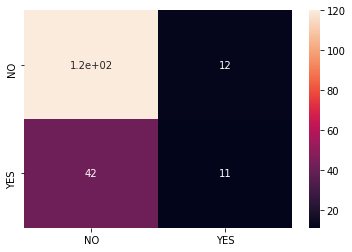

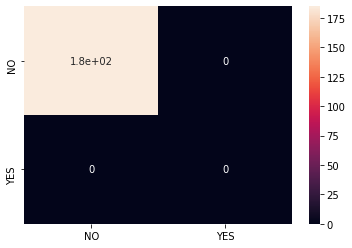

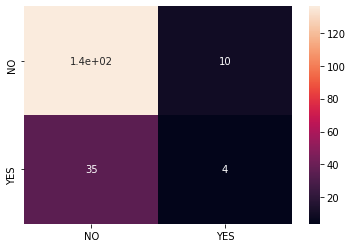

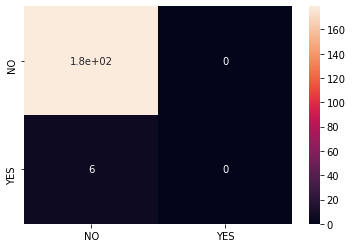

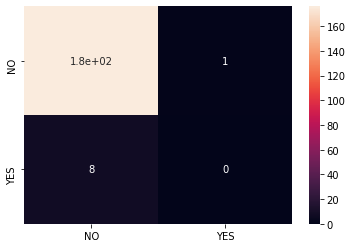

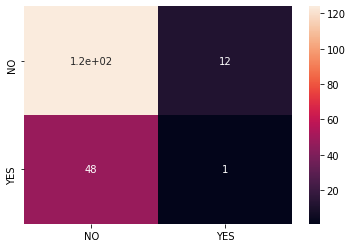

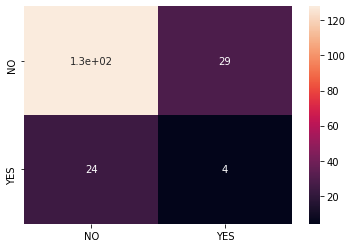

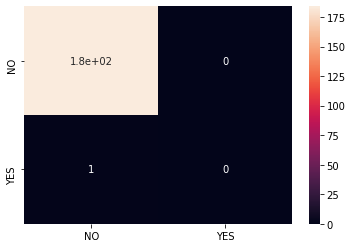

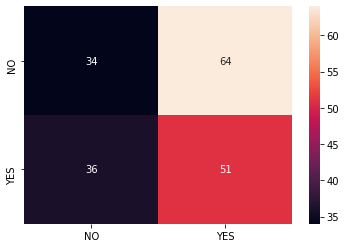

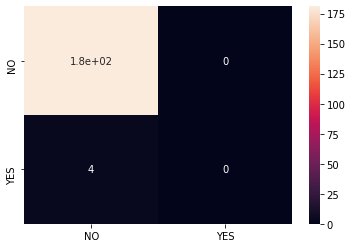

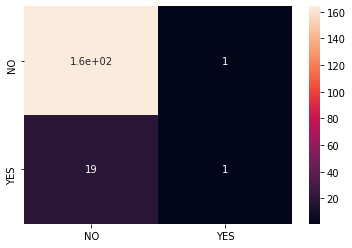

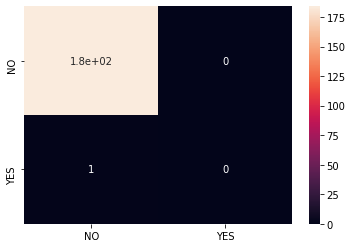

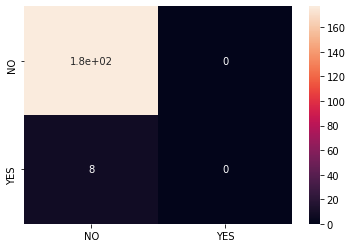

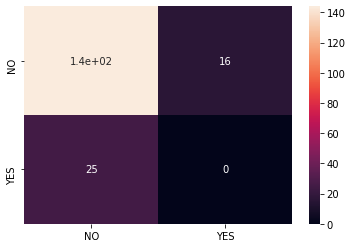

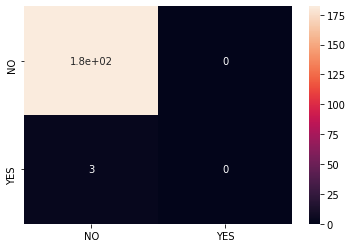

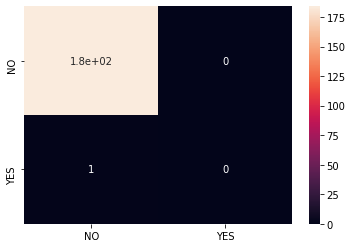

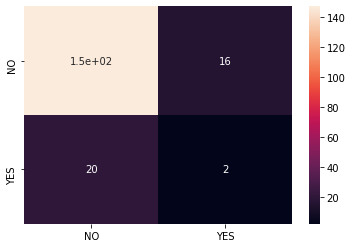

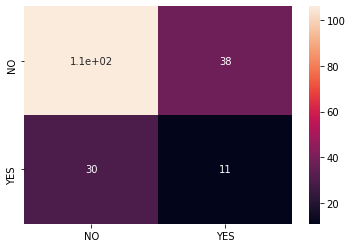

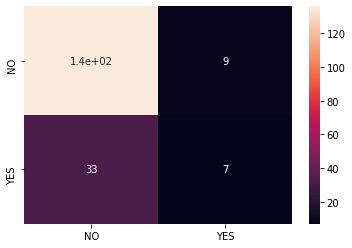

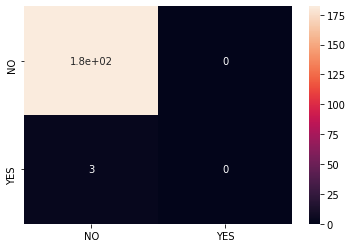

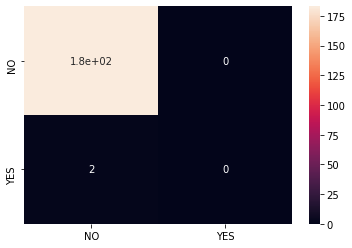

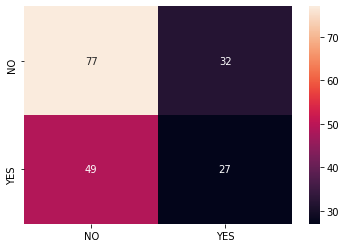

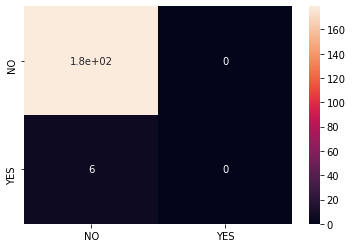

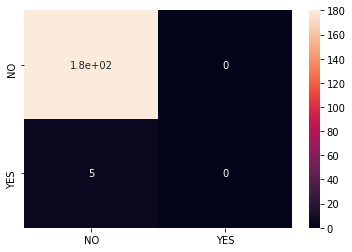

In [90]:
for i, mat in enumerate(confusion_mat_lstm):
  print("Heatmap for:", genres[i])
  make_heatmap(mat)

In [91]:
for i, mat in enumerate(confusion_mat_lstm):
  print(genres[i], (mat[0][1] + mat[1][0]), (mat[0][0] + mat[1][1]))

action 54 131
adult 0 185
adventure 45 140
animation 6 179
biography 9 176
comedy 60 125
crime 53 132
documentary 1 184
drama 100 85
family 4 181
fantasy 20 165
filmnoir 1 184
history 8 177
horror 41 144
music 3 182
musical 1 184
mystery 36 149
romance 68 117
scifi 42 143
short 3 182
sport 2 183
thriller 81 104
war 6 179
western 5 180


In [152]:
feature_words = ['love', 'date', 'men', 'man', 'women', 'woman', 'kill', 'murder', 'live', 'hate', 'scared', 'happy', 'sad', 'fear']
for word in feature_words:
  print(word_index[word])

55
641
198
33
396
214
97
671
183
262
465
321
1129
729


In [106]:
start_df = []
for word in feature_words:
  print("Key Word:", word)
  idx = word_index[word]
  for i, script in enumerate(X_test_lstm):
    cond = script == idx
    word_count = np.count_nonzero(cond)
    if word_count > 0:
      d = {
          "Index": i, "Word": word, "Count": word_count, "Genres": [genres[g] for g in range(len(y_test[i])) if y_test[i][g] == 1], "Predictions": [genres[g] for g in range(len(y_test[i])) if pred_test_lstm[i][g] == 1]
      }
      start_df.append(d)
      # print("Index:", i, "Word:", word, "Count:", word_count, "Genres:", [genres[g] for g in range(len(y_test[i])) if y_test[i][g] == 1], "Predictions:", [genres[g] for g in range(len(y_test[i])) if pred_test_lstm[i][g] == 1])
# love_cond = X_test_lstm[0] == 63
# np.count_nonzero(love_cond)


Key Word: love
Key Word: date
Key Word: men
Key Word: man
Key Word: women
Key Word: woman
Key Word: kill
Key Word: murder
Key Word: live
Key Word: hate
Key Word: scared
Key Word: happy
Key Word: sad
Key Word: fear


In [0]:
full_df = df(start_df)

In [111]:
print(full_df["Genres"][0][0])

adventure


In [0]:
freq_df = []

for word in feature_words:
  idx = word_index[word]
  for n, g in enumerate(genres):
    freq = 0
    for i, script in enumerate(X_test_lstm):
      cond = script == idx
      word_count = np.count_nonzero(cond)
      if word_count > 0 and pred_test_lstm[i][n] == 1:
        freq += word_count
    d = np.array((g, freq))
    freq_df.append(d)




In [0]:
freq_df = df(freq_df)

In [136]:
print(freq_df)

[array(['action', '43'], dtype='<U6'), array(['adult', '0'], dtype='<U5'), array(['adventure', '46'], dtype='<U9'), array(['animation', '0'], dtype='<U9'), array(['biography', '0'], dtype='<U9'), array(['comedy', '28'], dtype='<U6'), array(['crime', '64'], dtype='<U5'), array(['documentary', '0'], dtype='<U11'), array(['drama', '198'], dtype='<U5'), array(['family', '0'], dtype='<U6'), array(['fantasy', '8'], dtype='<U7'), array(['filmnoir', '0'], dtype='<U8'), array(['history', '0'], dtype='<U7'), array(['horror', '24'], dtype='<U6'), array(['music', '0'], dtype='<U5'), array(['musical', '0'], dtype='<U7'), array(['mystery', '33'], dtype='<U7'), array(['romance', '101'], dtype='<U7'), array(['scifi', '43'], dtype='<U5'), array(['short', '0'], dtype='<U5'), array(['sport', '0'], dtype='<U5'), array(['thriller', '122'], dtype='<U8'), array(['war', '0'], dtype='<U3'), array(['western', '0'], dtype='<U7'), array(['action', '4'], dtype='<U6'), array(['adult', '0'], dtype='<U5'), array(['ad

In [0]:
word_g_freq_mat = []

for word in feature_words:
  idx = word_index[word]
  gen_vec = np.zeros(len(genres))
  for n, g in enumerate(genres):
    freq = 0
    for i, script in enumerate(X_test_lstm):
      cond = script == idx
      word_count = np.count_nonzero(cond)
      if word_count > 0 and pred_test_lstm[i][n] == 1:
        freq += word_count
    gen_vec[n] = freq
  word_g_freq_mat.append(gen_vec)
word_mat = np.asarray(word_g_freq_mat, dtype = int)

In [0]:
# print(word_mat)

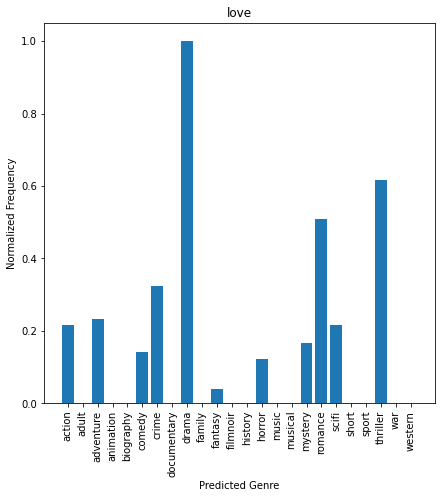

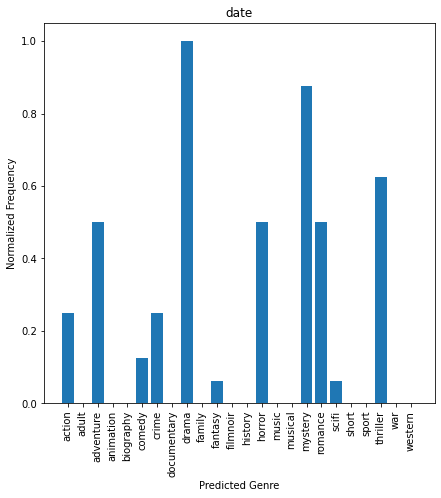

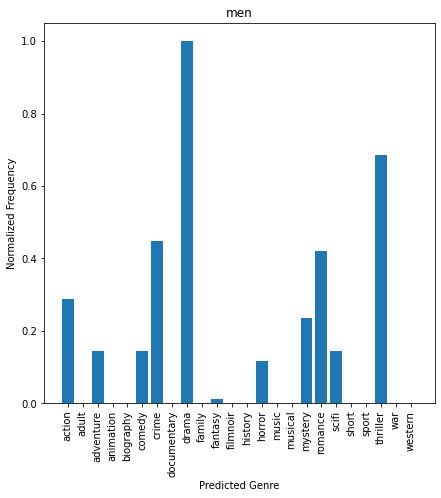

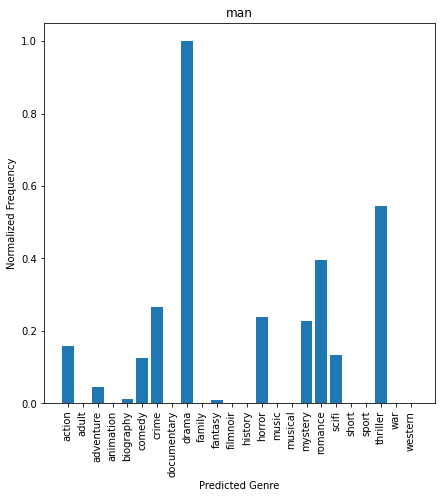

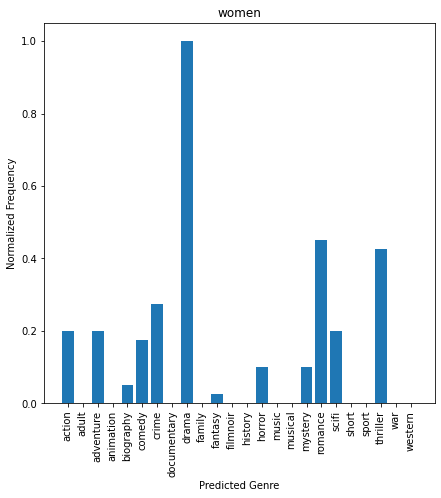

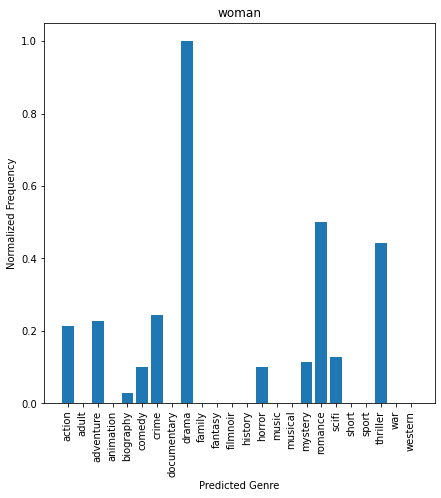

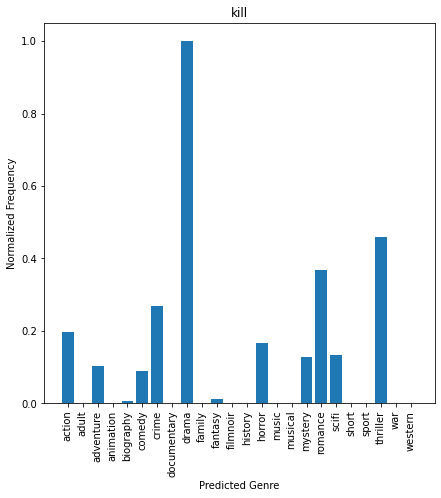

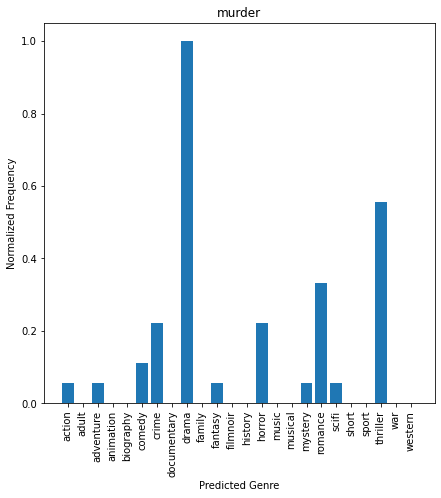

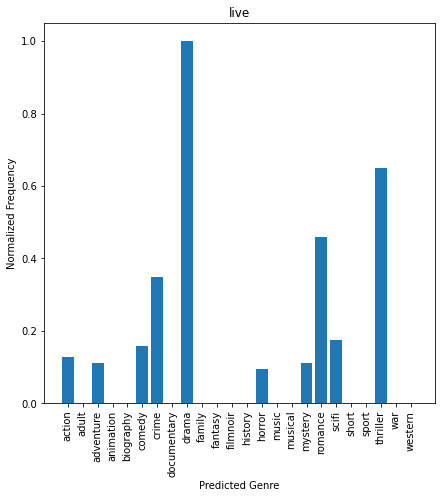

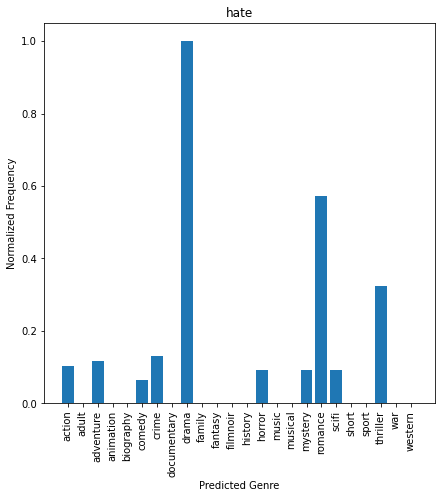

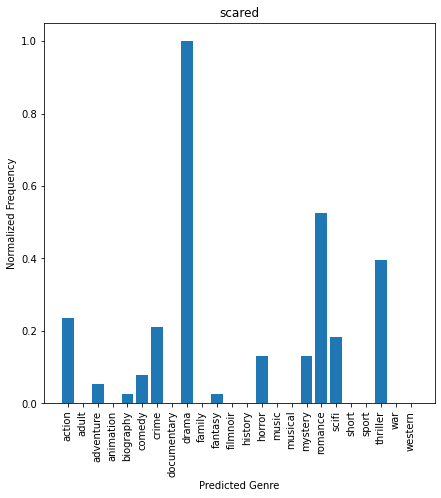

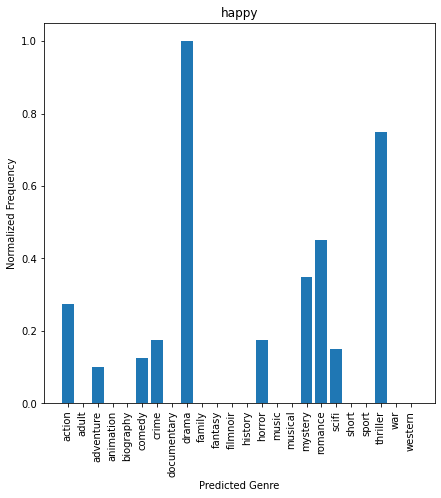

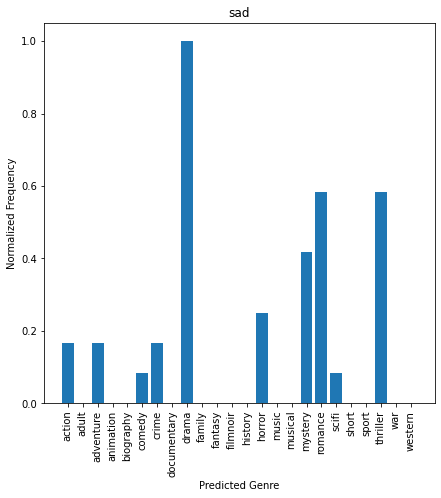

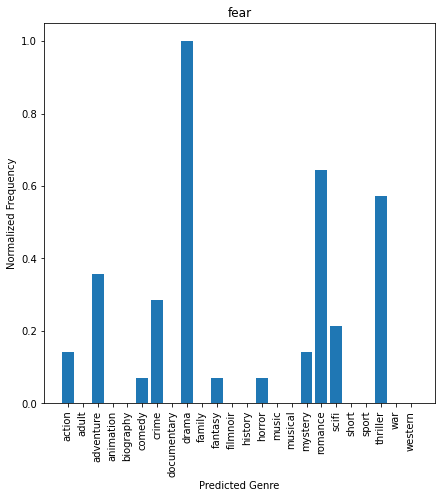

In [182]:
for i in range(len(word_mat)):
  word = feature_words[i]
  create_freq_bar_chart(word, np.divide(word_mat[i], np.max(word_mat[i])), genres)


In [0]:
def create_freq_bar_chart(word, data_vals, labels):
  fig = plt.figure(figsize=(7, 7))
  # ax = fig.add_axes([0, 0, 1, 1])
  ax = fig.add_subplot(111)
  ax.bar(labels, data_vals)
  ax.set_title(word)
  plt.xticks(rotation = 90)
  ax.set_ylabel('Normalized Frequency')
  ax.set_xlabel('Predicted Genre')
  plt.savefig("freq_" + word+ ".png")
  files.download("freq_" + word+ ".png")
  plt.show()